In [1]:
import pandas as pd

In [114]:
df = pd.read_parquet("../data/df_end_transaction_ma.parquet")

In [115]:
df

,product,price,amount,place,datetime
0,Целебные травы,3.90,1.242125,Анор Лондо,2216-01-02 16:28:00
1,Целебные травы,3.90,-0.079689,Анор Лондо,2216-01-02 16:21:00
2,Целебные травы,3.90,0.882450,Анор Лондо,2216-01-02 03:03:00
3,Целебные травы,3.90,0.621377,Анор Лондо,2216-01-02 03:12:00
4,Целебные травы,3.90,1.367161,Анор Лондо,2216-01-02 05:33:00
...,...,...,...,...,...
875031,Эстус,9.28,1.079104,Фалькония,2218-09-27 14:50:00
875032,Эстус,9.28,1.580617,Фалькония,2218-09-27 06:16:00
875033,Эстус,9.28,1.738492,Фалькония,2218-09-27 11:14:00
875034,Эстус,9.28,0.430340,Фалькония,2218-09-27 22:24:00


(price - cost) * amount -> max <=> (price -> max) && (amount -> max)  
price ∈ (0, concurrent_price*1.2]  
d(price) ∈ [-1, 1]  
price[0] == price[1] == ... == price[k1], price[k1+1] == price[k1+2] == ... == price[k2], ..., price[kn] == ... == price[89],  
где k1 = 2...90, k2 = k1 + 3...90, kn = k[n-1]...90

In [116]:
competit = pd.read_parquet("../data/df_competitors.parquet")
cost = pd.read_parquet("../data/df_cost.parquet")
weather = pd.read_parquet("../data/weather_df.parquet")

In [117]:
import matplotlib.pyplot as plt

In [118]:
competit.head()

,place,product,competitor,price,date
0,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-04
1,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-05
2,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-06
3,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-09
5,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-11


In [119]:
cost.head()

,place,product,cost,date
0,Анор Лондо,Целебные травы,2.07,2216-01-02
1,Анор Лондо,Целебные травы,3.07,2216-01-26
2,Анор Лондо,Целебные травы,3.30,2216-02-12
3,Анор Лондо,Целебные травы,4.04,2216-03-06
4,Анор Лондо,Целебные травы,3.88,2216-03-27


In [120]:
df.head()

,product,price,amount,place,datetime
0,Целебные травы,3.9,1.242125,Анор Лондо,2216-01-02 16:28:00
1,Целебные травы,3.9,-0.079689,Анор Лондо,2216-01-02 16:21:00
2,Целебные травы,3.9,0.882450,Анор Лондо,2216-01-02 03:03:00
3,Целебные травы,3.9,0.621377,Анор Лондо,2216-01-02 03:12:00
4,Целебные травы,3.9,1.367161,Анор Лондо,2216-01-02 05:33:00


amount в день равен сумме amount в каждый известный час времени этого дня

In [121]:
trans = df.copy()
trans["date"] = trans["datetime"].dt.strftime('%Y-%m-%d')
trans = trans.groupby(["product", "price", "place", "date"]).agg({"amount": sum}).reset_index()

In [122]:
trans

,product,price,place,date,amount
0,Целебные травы,2.73,Нокрон,2216-01-02,43.848762
1,Целебные травы,2.73,Нокрон,2216-01-03,54.649575
2,Целебные травы,2.73,Нокрон,2216-01-04,52.021861
3,Целебные травы,2.73,Нокрон,2216-01-05,47.634119
4,Целебные травы,2.73,Нокрон,2216-01-06,40.442636
...,...,...,...,...,...
15020,Эстус,23.89,Кеджистан,2218-09-23,53.420186
15021,Эстус,24.42,Кеджистан,2218-09-24,55.221321
15022,Эстус,24.42,Кеджистан,2218-09-25,57.675298
15023,Эстус,24.42,Кеджистан,2218-09-26,39.720947


In [123]:
trans['competitor'] = 'Our_company'
cost['competitor'] = 'cost'
cost.rename(columns={'cost': 'price'}, inplace=True)
competit = pd.concat([competit, trans.drop(["amount"], axis=1), cost], ignore_index=True)
competit['date'] = pd.to_datetime(competit['date'])

Добавили в competit цену(cost) и цену в нашей компании(Our_company)

In [124]:
competit

,place,product,competitor,price,date
0,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-04
1,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-05
2,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-06
3,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-09
4,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-11
...,...,...,...,...,...
47936,Фалькония,Эстус,cost,3.10,2218-07-29
47937,Фалькония,Эстус,cost,7.20,2218-08-10
47938,Фалькония,Эстус,cost,3.31,2218-08-27
47939,Фалькония,Эстус,cost,3.26,2218-09-16


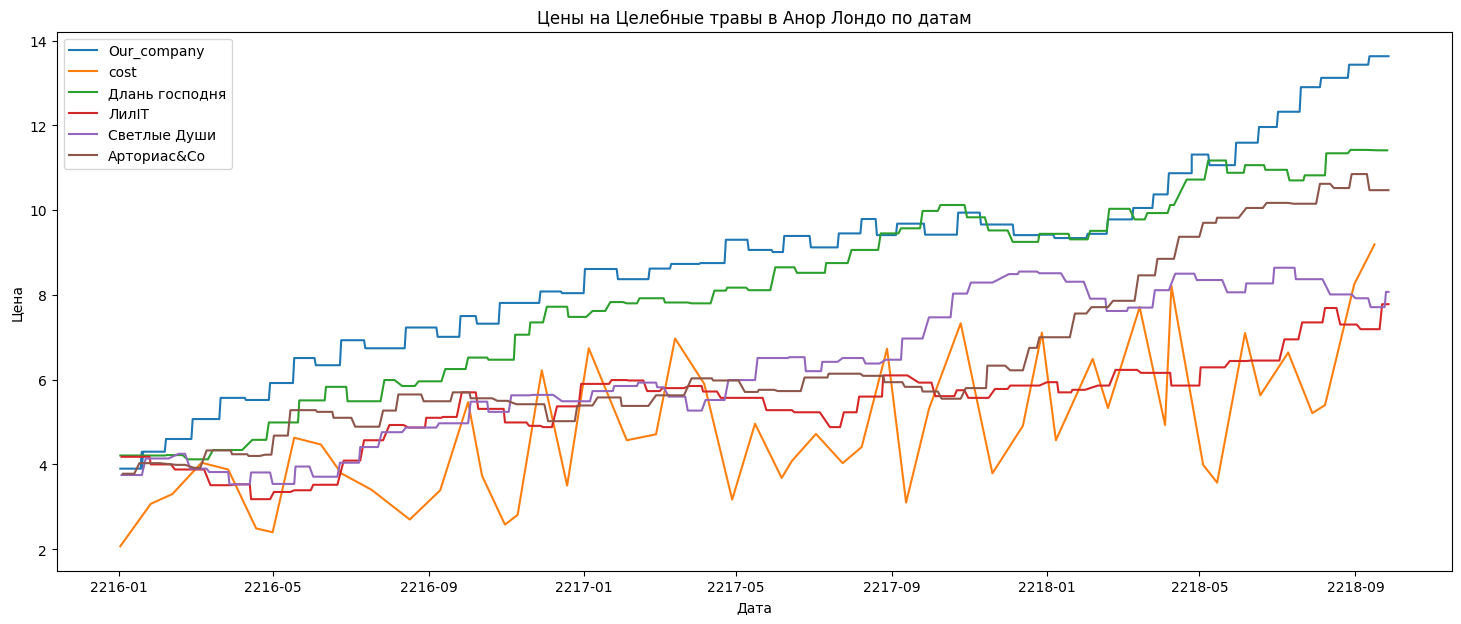

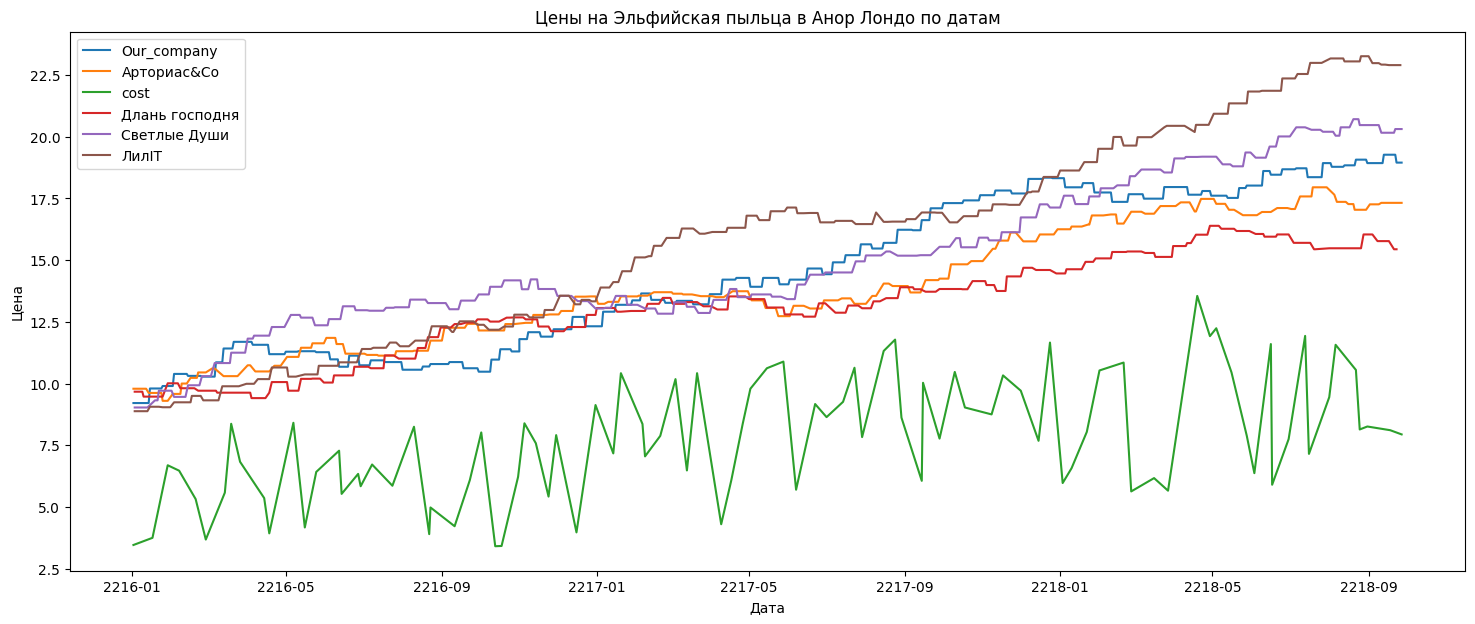

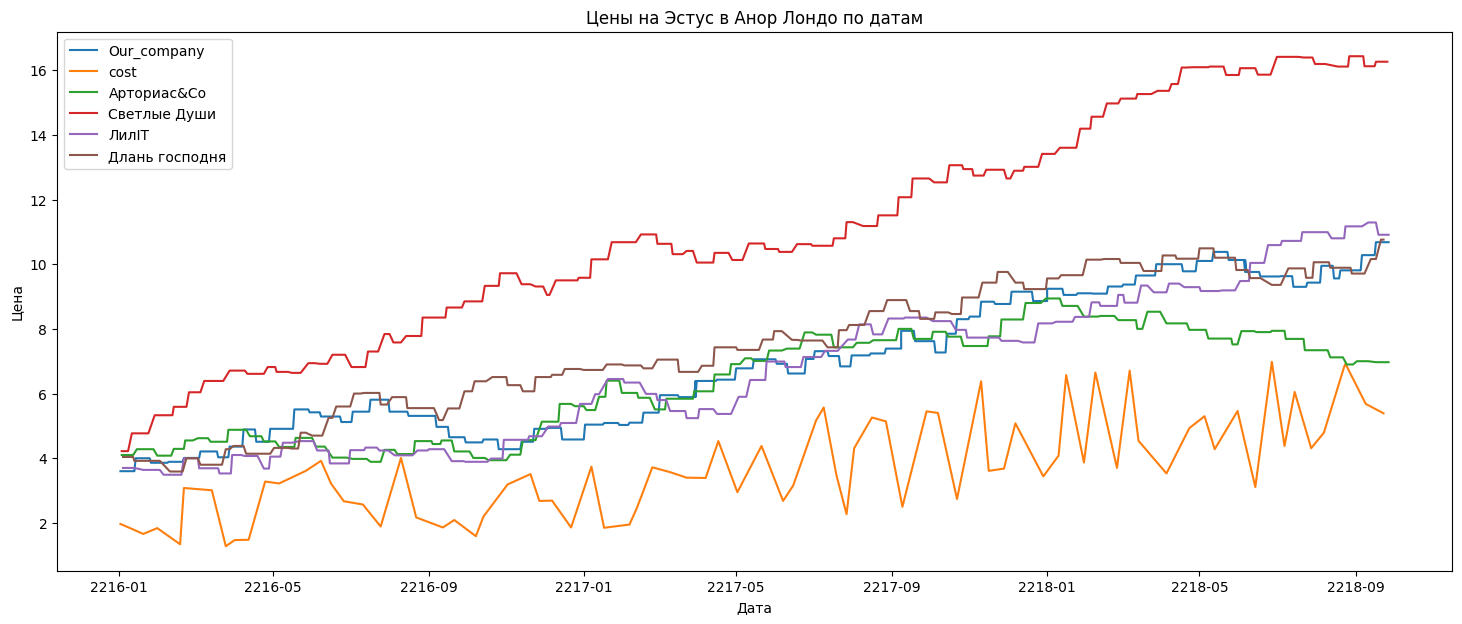

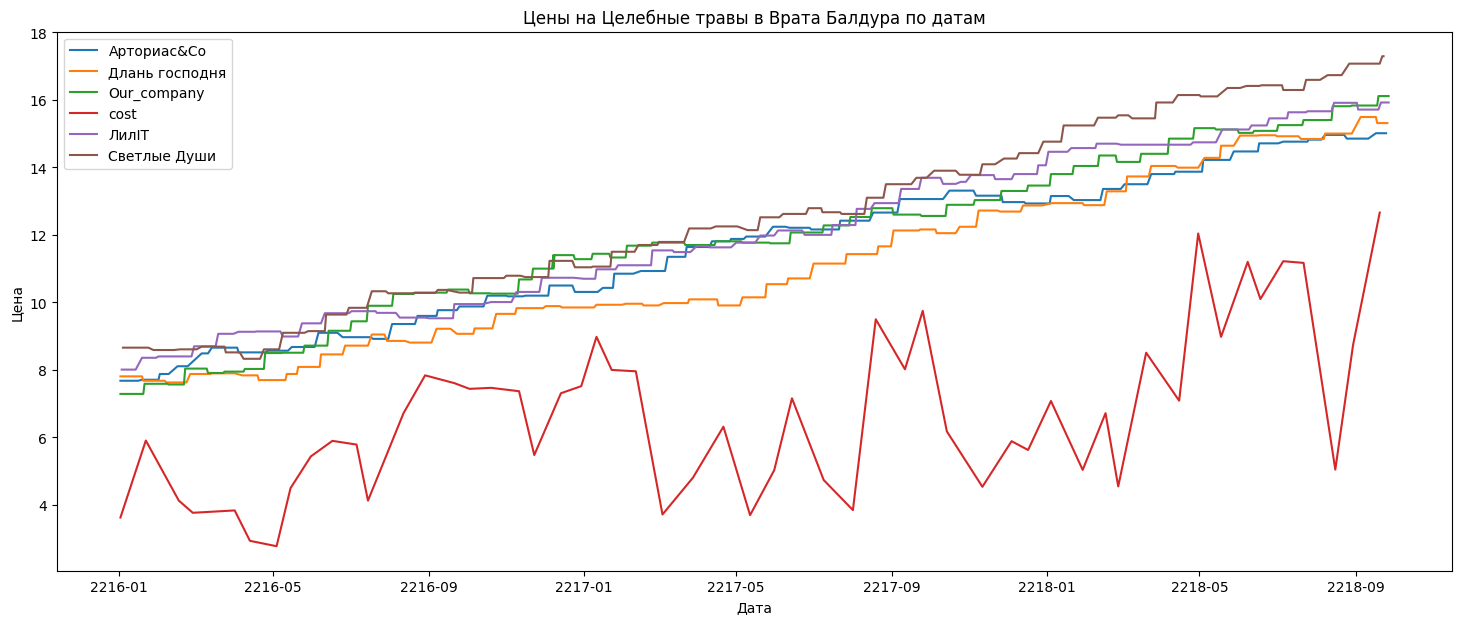

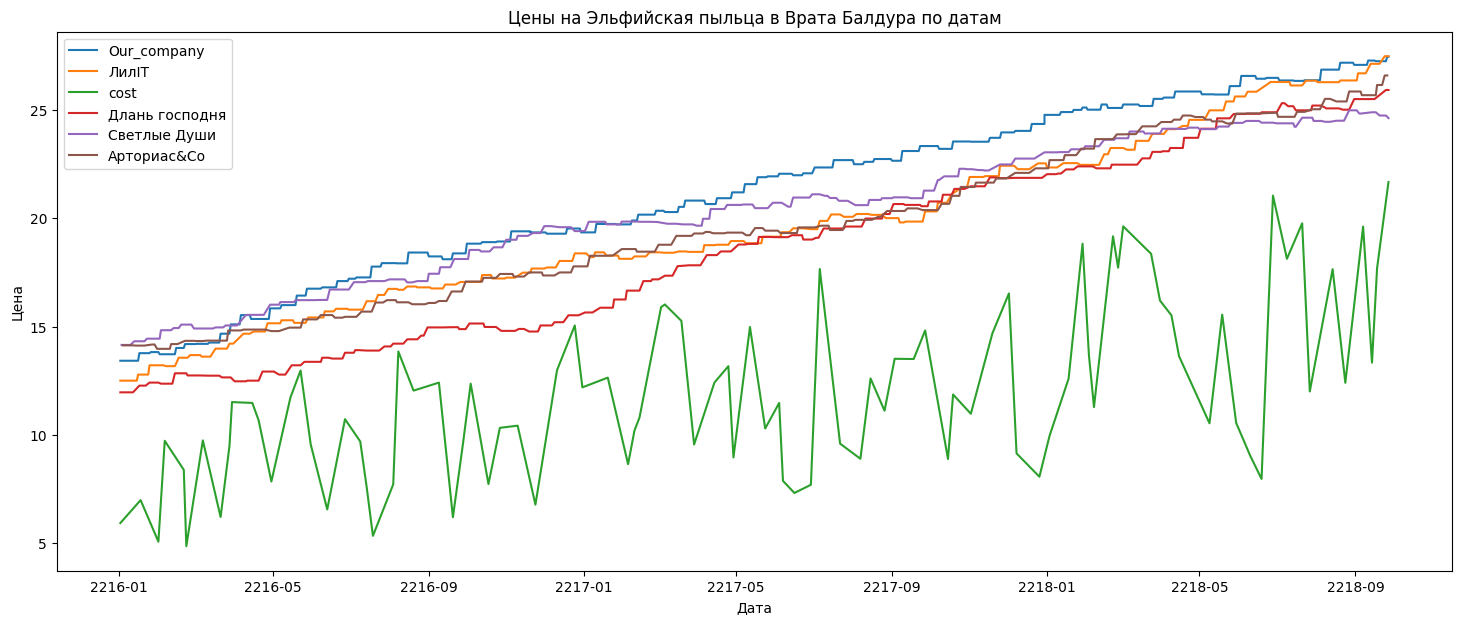

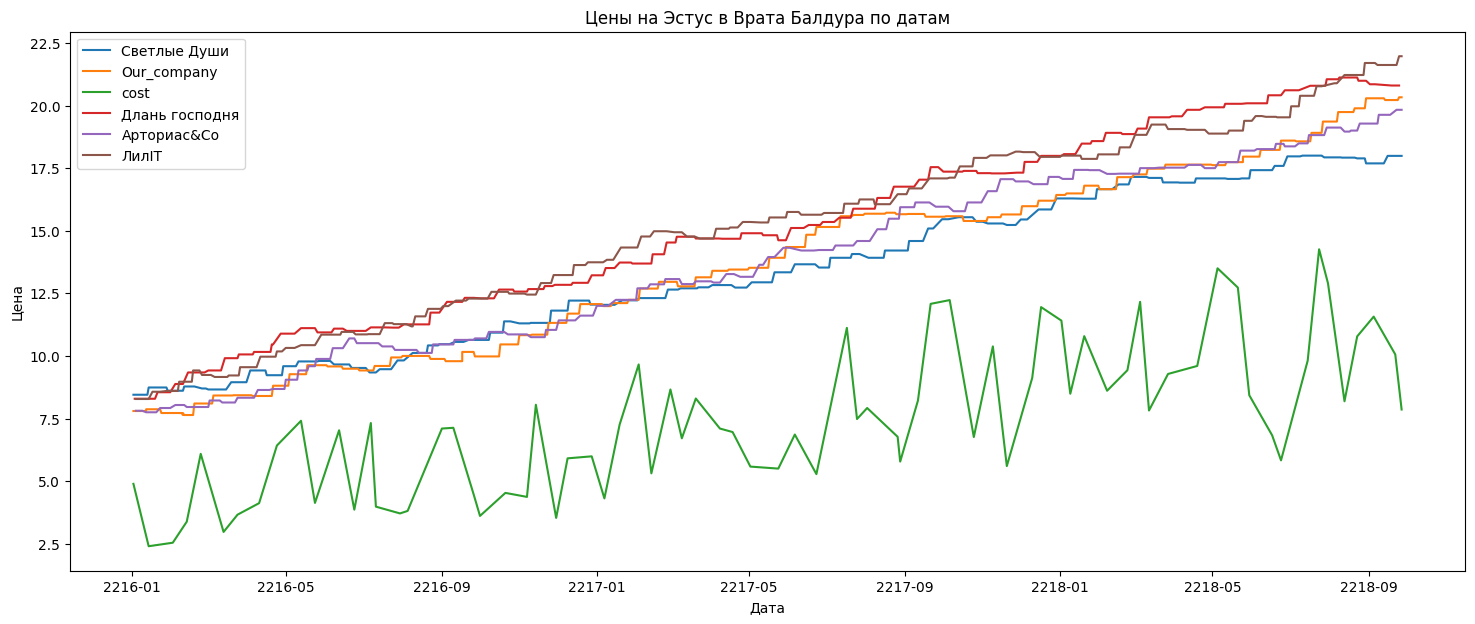

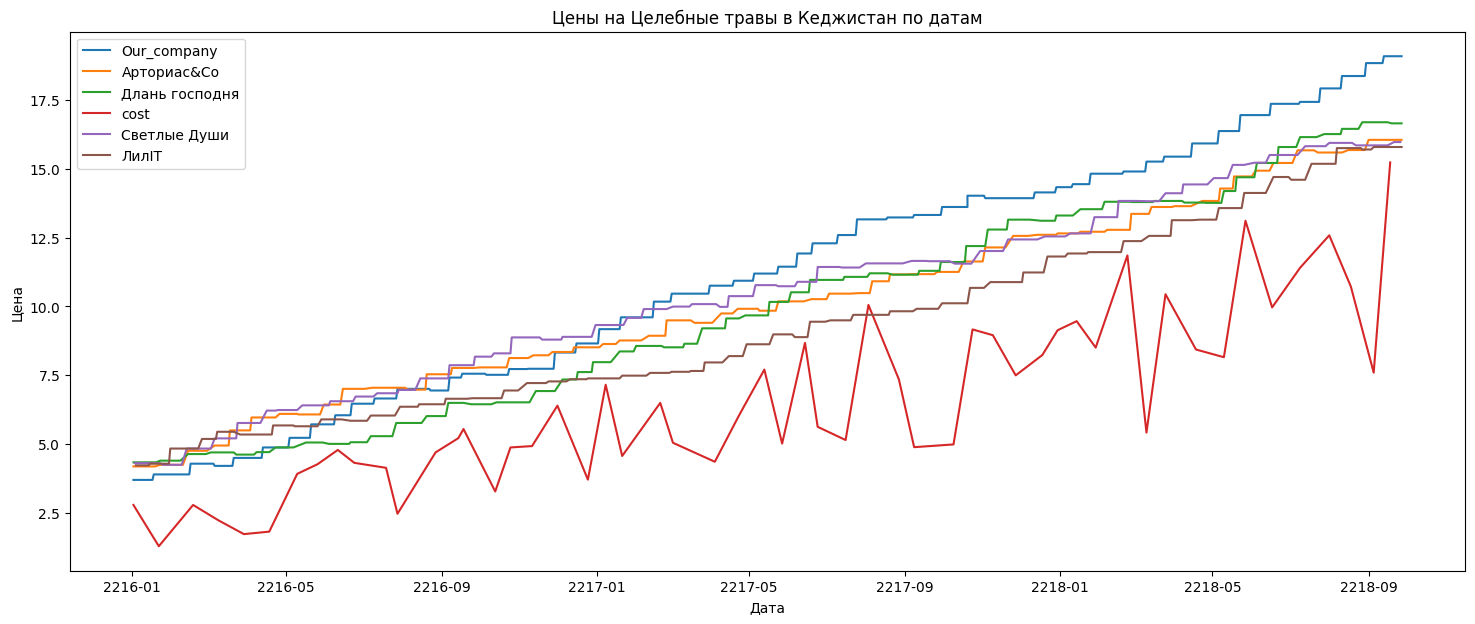

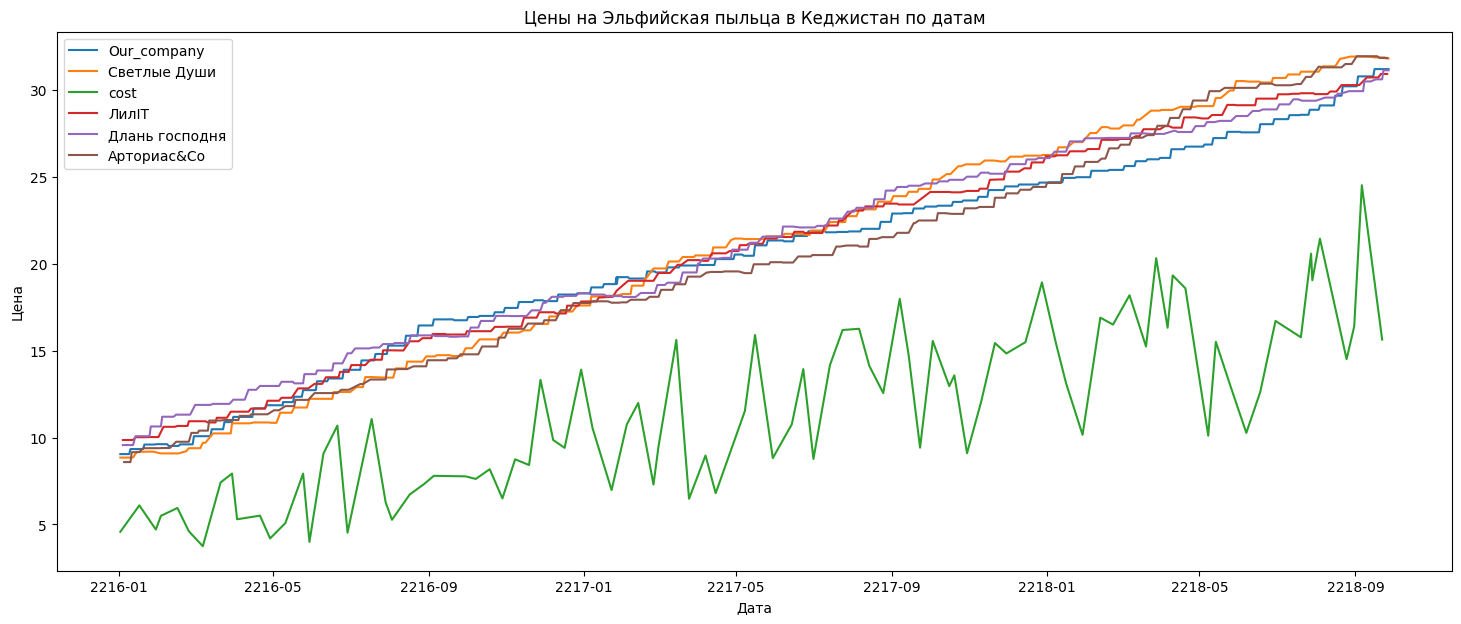

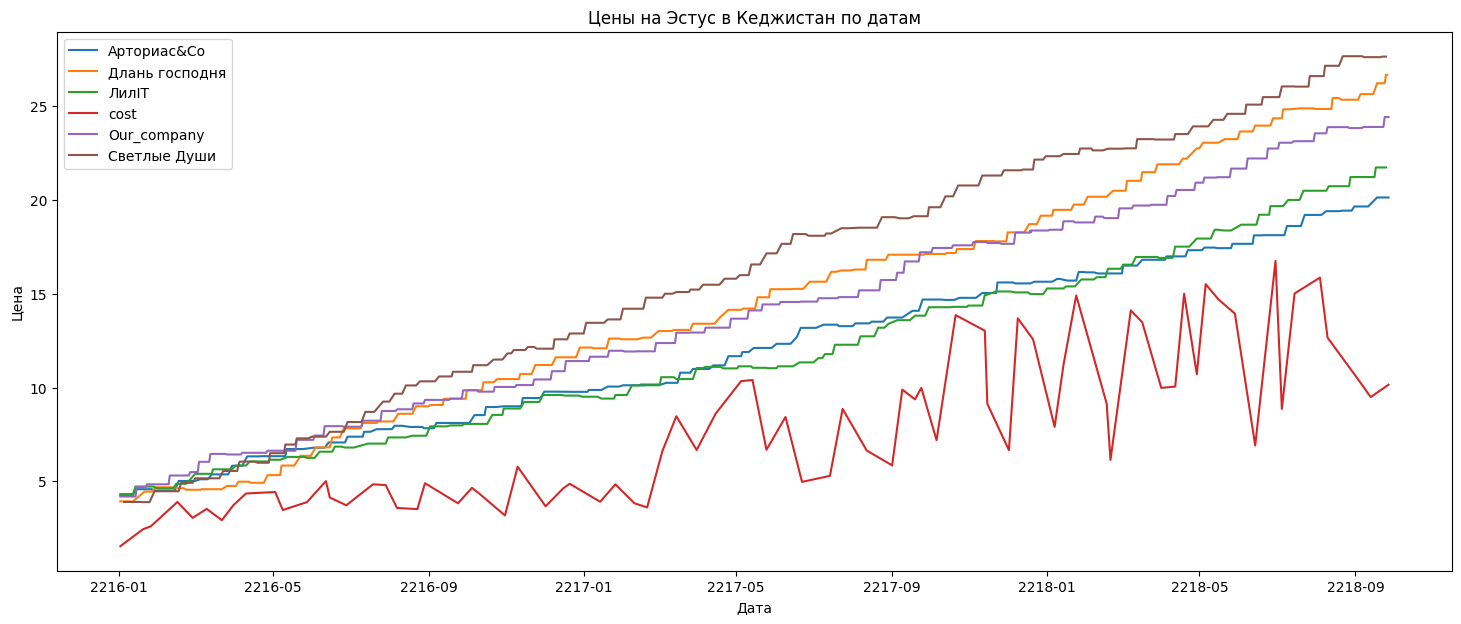

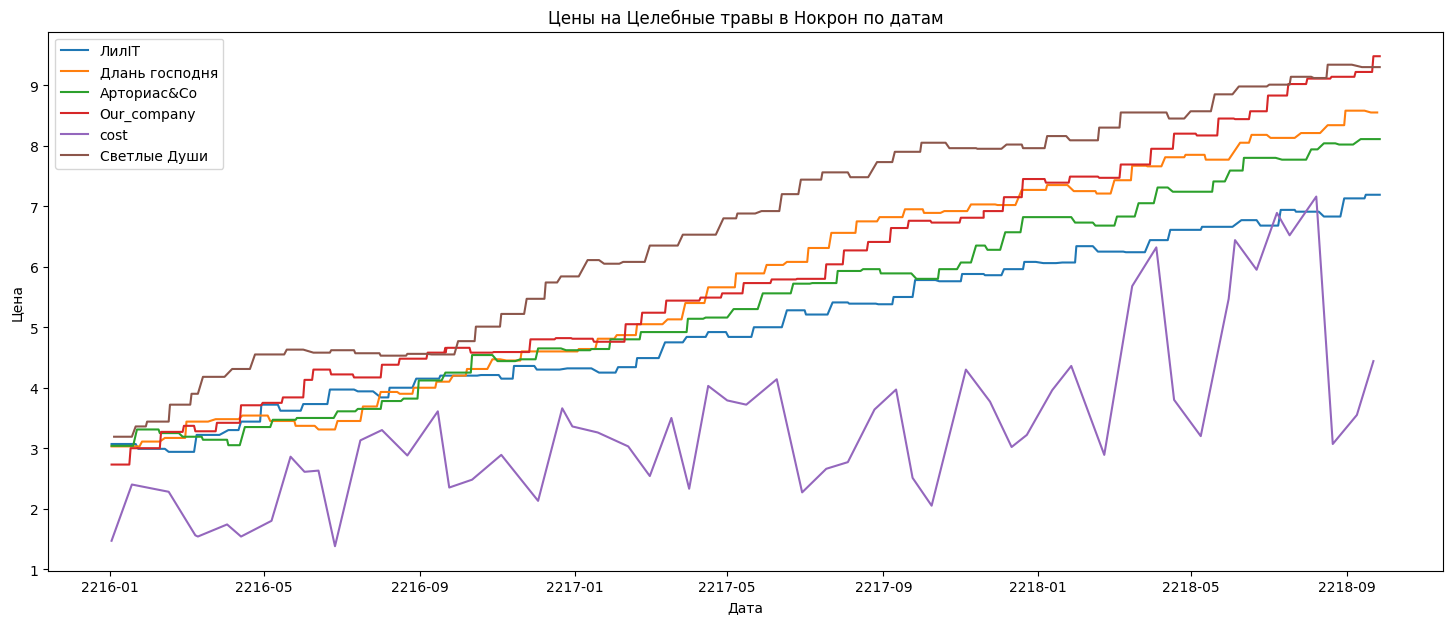

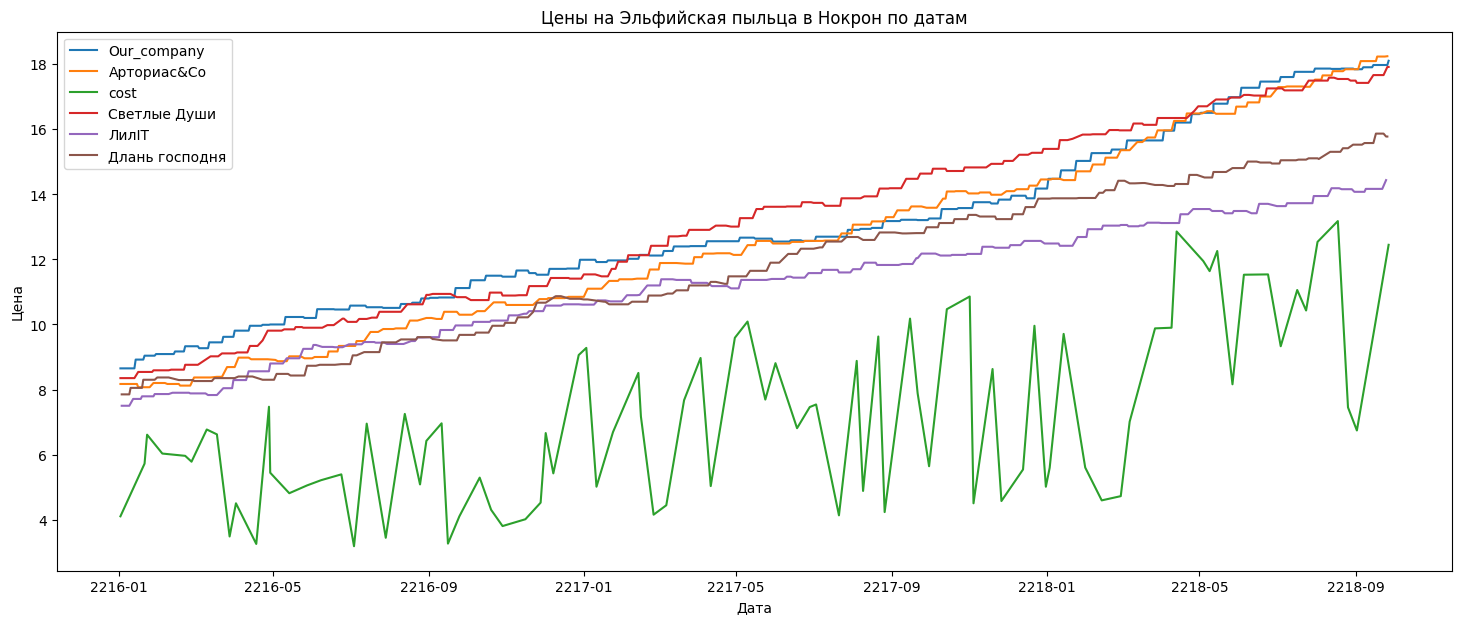

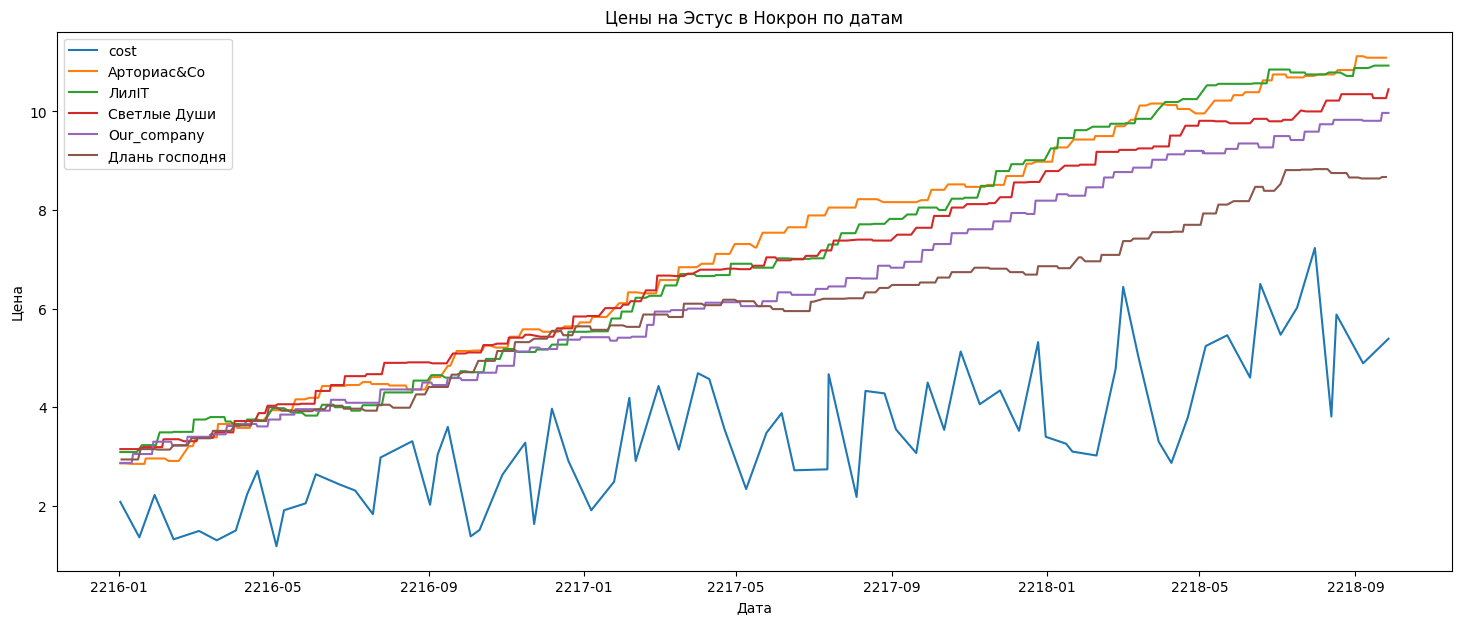

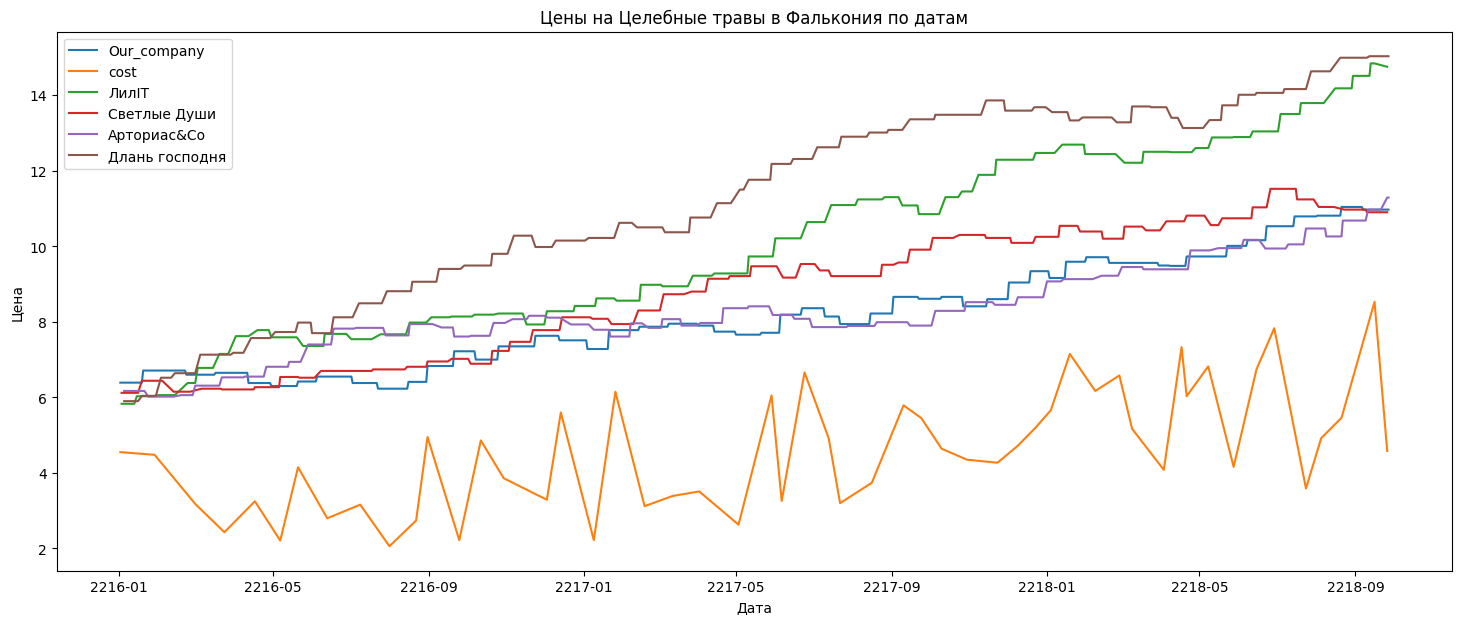

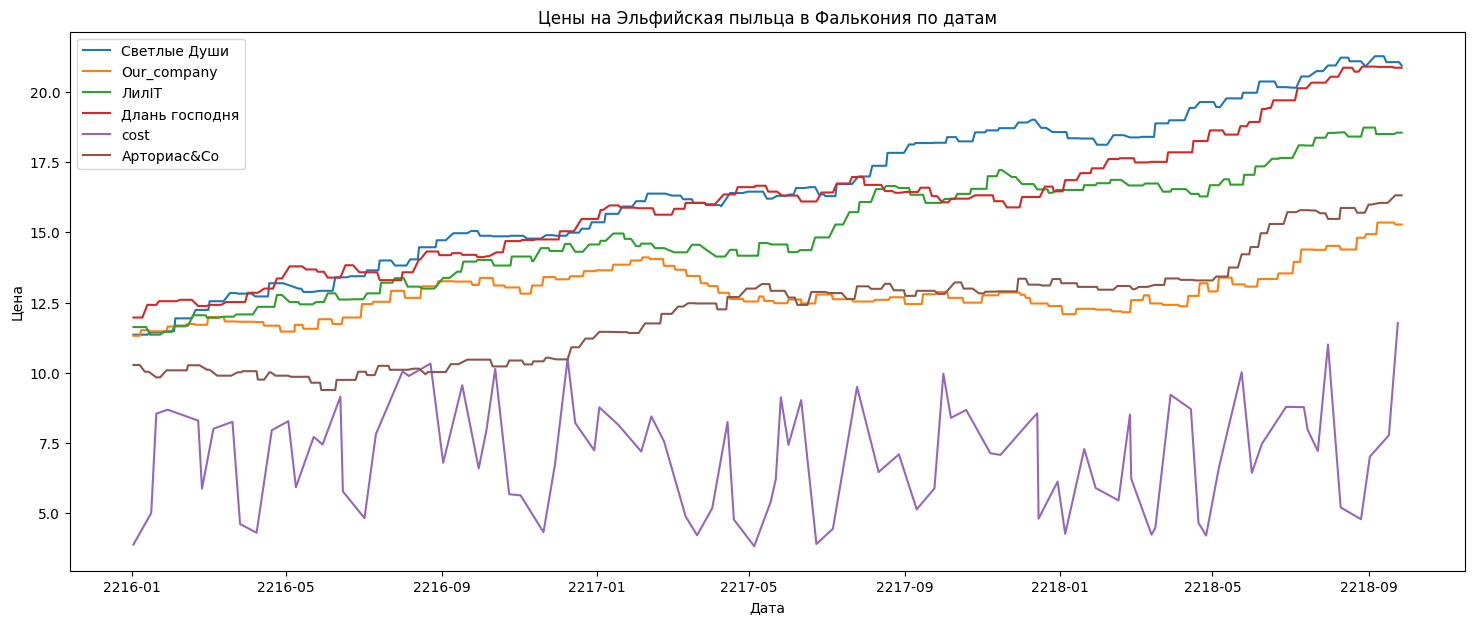

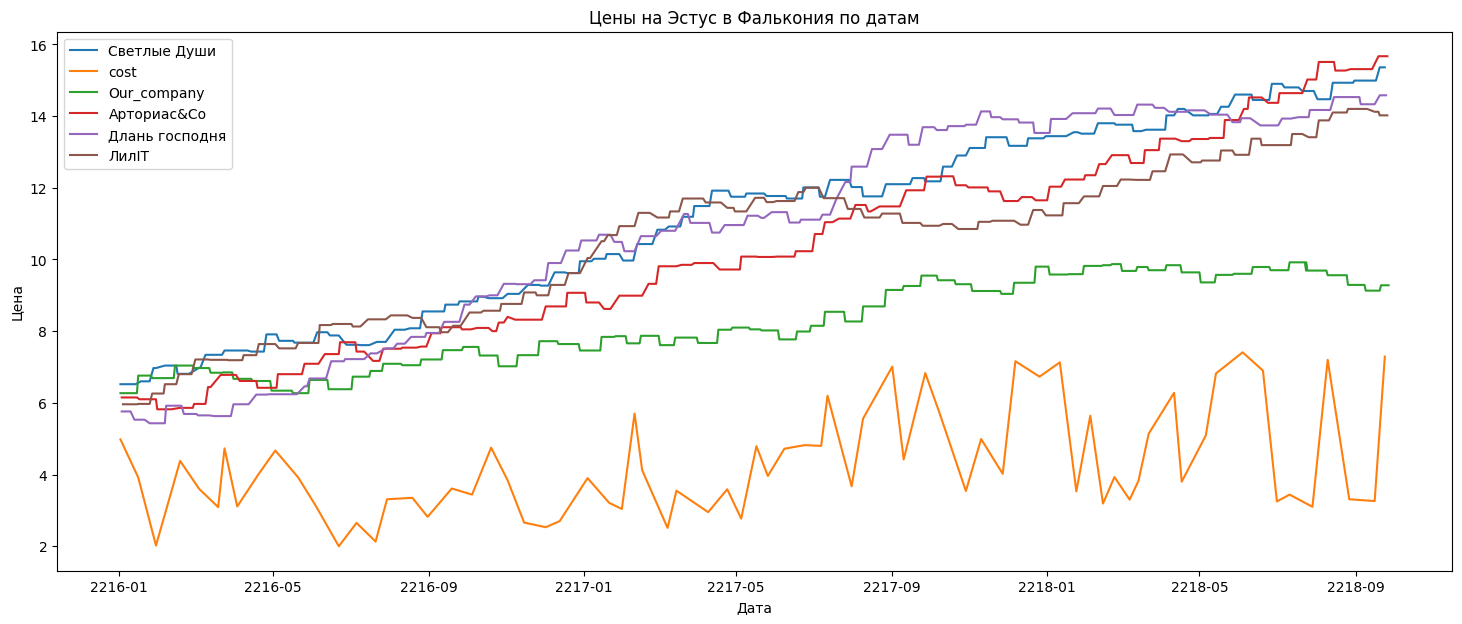

In [125]:
places = competit['place'].unique()
products = competit['product'].unique()
competit = competit.sort_values(by='date')

for place in places:
    for product in products:
        subset = competit[(competit['place'] == place) & (competit['product'] == product)]
        
        if not subset.empty:
            plt.figure(figsize=(18, 7))
            plt.title(f'Цены на {product} в {place} по датам')
            plt.xlabel('Дата')
            plt.ylabel('Цена')
            
            for company in subset['competitor'].unique():
                company_data = subset[subset['competitor'] == company]
                plt.plot(company_data['date'], company_data['price'], label=company)
            
            plt.legend()
            plt.show()

Как видим, цена нашей компании в основном либо ниже, либо в середине других компаний, редко выше(и не сильно)

In [126]:
weather

,place,hot,rain,snow,date
0,Фалькония,0,0,0,2216-01-02
1,Анор Лондо,1,0,0,2216-01-02
2,Врата Балдура,0,0,1,2216-01-02
3,Нокрон,0,0,0,2216-01-02
4,Кеджистан,0,0,1,2216-01-02
...,...,...,...,...,...
4995,Фалькония,0,0,0,2218-09-27
4996,Анор Лондо,0,0,1,2218-09-27
4997,Врата Балдура,1,0,0,2218-09-27
4998,Нокрон,0,0,0,2218-09-27


In [127]:
competit

,place,product,competitor,price,date
47792,Нокрон,Эстус,cost,2.08,2216-01-02
20647,Фалькония,Эльфийская пыльца,Светлые Души,11.36,2216-01-02
41895,Анор Лондо,Эстус,Our_company,3.60,2216-01-02
31901,Кеджистан,Целебные травы,Our_company,3.69,2216-01-02
2103,Врата Балдура,Целебные травы,Арториас&Co,7.68,2216-01-02
...,...,...,...,...,...
20646,Фалькония,Эльфийская пыльца,ЛилIT,18.55,2218-09-27
21159,Фалькония,Эльфийская пыльца,Светлые Души,20.94,2218-09-27
7952,Нокрон,Целебные травы,ЛилIT,7.19,2218-09-27
19597,Фалькония,Эльфийская пыльца,Арториас&Co,16.32,2218-09-27


Объединяем по городам дате погоду и добавляем amount по дате, продукту и месту

In [129]:
merged_df = pd.merge(competit, weather, on=['date', 'place'], how='left')

In [130]:
trans['date'] = pd.to_datetime(trans['date'])
merged_df = pd.merge(merged_df, trans[["date", "amount", 'product', 'place']], on=['date', 'product', 'place'], how='left')

In [133]:
merged_df

,place,product,competitor,price,date,hot,rain,snow,amount
0,Нокрон,Эстус,cost,2.08,2216-01-02,0,0,0,39.825309
1,Фалькония,Эльфийская пыльца,Светлые Души,11.36,2216-01-02,0,0,0,43.559214
2,Анор Лондо,Эстус,Our_company,3.60,2216-01-02,1,0,0,49.284395
3,Кеджистан,Целебные травы,Our_company,3.69,2216-01-02,0,0,1,51.118741
4,Врата Балдура,Целебные травы,Арториас&Co,7.68,2216-01-02,0,0,1,33.248669
...,...,...,...,...,...,...,...,...,...
48047,Фалькония,Эльфийская пыльца,ЛилIT,18.55,2218-09-27,0,0,0,43.288833
48048,Фалькония,Эльфийская пыльца,Светлые Души,20.94,2218-09-27,0,0,0,43.288833
48049,Нокрон,Целебные травы,ЛилIT,7.19,2218-09-27,0,0,0,44.632219
48050,Фалькония,Эльфийская пыльца,Арториас&Co,16.32,2218-09-27,0,0,0,43.288833


In [134]:
merged_df.to_parquet("../data/end_df.parquet")

In [135]:
date_un = merged_df['date'].unique()
place_un = merged_df['place'].unique()
product_un = merged_df['product'].unique()
comp_un = merged_df['competitor'].unique()

In [136]:
price_pivot = merged_df.pivot_table(
    index=['place', 'product', 'date'], 
    columns='competitor', 
    values='price', 
    aggfunc='first'
).reset_index()

mean_values = merged_df.groupby(['place', 'product', 'date'])[['hot', 'rain', 'snow', 'amount']].mean().reset_index()

result_df = pd.merge(price_pivot, mean_values, on=['place', 'product', 'date'])

result_df.reset_index(drop=True, inplace=True)


In [147]:
cost = [0 for i in range(6)]
df = result_df.copy()
flag = [0 for i in range(6)]

for i in range(len(result_df)):
    for j in range(3, 9):
        if flag[j-3] == 1:
            continue
        if not pd.isna(result_df.iloc[i, j]):
            cost[j-3] = result_df.iloc[i, j]
            flag[j-3] = 1
        if sum(flag) == 6:
            break
    if sum(flag) == 6:
        break

In [148]:
for i in range(len(result_df)):
    for j in range(3, 9):
        if not pd.isna(result_df.iloc[i, j]):
            cost[j-3] = result_df.iloc[i, j]
        else:
            df.iloc[i, j] = cost[j-3]

Делаю датасет более удобным для линейной регрессии

In [149]:
df

,place,product,date,Our_company,cost,Арториас&Co,Длань господня,ЛилIT,Светлые Души,hot,rain,snow,amount
0,Анор Лондо,Целебные травы,2216-01-02,3.90,2.07,3.78,4.21,4.18,3.75,1.0,0.0,0.0,39.889286
1,Анор Лондо,Целебные травы,2216-01-03,3.90,2.07,3.78,4.21,4.18,3.75,1.0,0.0,0.0,42.086108
2,Анор Лондо,Целебные травы,2216-01-04,3.90,2.07,3.78,4.21,4.18,3.75,0.0,0.0,0.0,37.922631
3,Анор Лондо,Целебные травы,2216-01-05,3.90,2.07,3.78,4.21,4.18,3.75,0.0,0.0,0.0,38.839745
4,Анор Лондо,Целебные травы,2216-01-06,3.90,2.07,3.78,4.21,4.18,3.75,0.0,0.0,1.0,45.990511
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Фалькония,Эстус,2218-09-23,9.28,3.26,15.67,14.58,14.02,15.36,0.0,1.0,0.0,54.451677
14996,Фалькония,Эстус,2218-09-24,9.28,7.29,15.67,14.58,14.02,15.36,0.0,0.0,0.0,48.684146
14997,Фалькония,Эстус,2218-09-25,9.28,7.29,15.67,14.58,14.02,15.36,0.0,0.0,1.0,57.460737
14998,Фалькония,Эстус,2218-09-26,9.28,7.29,15.67,14.58,14.02,15.36,0.0,0.0,1.0,55.267398


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   place           15000 non-null  object        
 1   product         15000 non-null  object        
 2   date            15000 non-null  datetime64[ns]
 3   Our_company     15000 non-null  float64       
 4   cost            15000 non-null  float64       
 5   Арториас&Co     15000 non-null  float64       
 6   Длань господня  15000 non-null  float64       
 7   ЛилIT           15000 non-null  float64       
 8   Светлые Души    15000 non-null  float64       
 9   hot             15000 non-null  float64       
 10  rain            15000 non-null  float64       
 11  snow            15000 non-null  float64       
 12  amount          14998 non-null  float64       
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 1.5+ MB


Заметил nan в amount, заменим их средним между соседними днями

In [153]:
df[df['amount'].isna()]

,place,product,date,Our_company,cost,Арториас&Co,Длань господня,ЛилIT,Светлые Души,hot,rain,snow,amount
4457,Врата Балдура,Эльфийская пыльца,2217-04-03,20.82,9.55,19.30,17.83,18.45,19.66,0.0,0.0,0.0,NaN
4546,Врата Балдура,Эльфийская пыльца,2217-07-01,22.08,7.69,19.58,19.02,19.50,21.11,0.0,0.0,0.0,NaN


In [155]:
df.iloc[[4456, 4458, 4545, 4547]]

,place,product,date,Our_company,cost,Арториас&Co,Длань господня,ЛилIT,Светлые Души,hot,rain,snow,amount
4456,Врата Балдура,Эльфийская пыльца,2217-04-02,20.82,9.55,19.30,17.83,18.45,19.66,0.0,1.0,0.0,16.606764
4458,Врата Балдура,Эльфийская пыльца,2217-04-04,20.82,9.55,19.30,17.83,18.45,19.66,0.0,1.0,0.0,12.303769
4545,Врата Балдура,Эльфийская пыльца,2217-06-30,22.08,7.69,19.58,19.02,19.50,21.11,0.0,0.0,0.0,5.369196
4547,Врата Балдура,Эльфийская пыльца,2217-07-02,22.35,7.69,19.58,19.02,19.50,21.11,0.0,0.0,1.0,17.283368


In [158]:
df.iloc[4457, 12] = df.iloc[[4457, 4458], 12].mean()
df.iloc[4546, 12] = df.iloc[[4545, 4547], 12].mean()

дату представим в виде колонок года, месяца и дня

In [164]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.drop('date', axis=1, inplace=True)

In [163]:
df.to_parquet("../data/end_df.parquet")

In [2]:
df = pd.read_parquet('../data/end_df.parquet')

In [3]:
df

,place,product,Our_company,cost,Арториас&Co,Длань господня,ЛилIT,Светлые Души,hot,rain,snow,amount,year,month,day
0,Анор Лондо,Целебные травы,3.90,2.07,3.78,4.21,4.18,3.75,1.0,0.0,0.0,39.889286,2216,1,2
1,Анор Лондо,Целебные травы,3.90,2.07,3.78,4.21,4.18,3.75,1.0,0.0,0.0,42.086108,2216,1,3
2,Анор Лондо,Целебные травы,3.90,2.07,3.78,4.21,4.18,3.75,0.0,0.0,0.0,37.922631,2216,1,4
3,Анор Лондо,Целебные травы,3.90,2.07,3.78,4.21,4.18,3.75,0.0,0.0,0.0,38.839745,2216,1,5
4,Анор Лондо,Целебные травы,3.90,2.07,3.78,4.21,4.18,3.75,0.0,0.0,1.0,45.990511,2216,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Фалькония,Эстус,9.28,3.26,15.67,14.58,14.02,15.36,0.0,1.0,0.0,54.451677,2218,9,23
14996,Фалькония,Эстус,9.28,7.29,15.67,14.58,14.02,15.36,0.0,0.0,0.0,48.684146,2218,9,24
14997,Фалькония,Эстус,9.28,7.29,15.67,14.58,14.02,15.36,0.0,0.0,1.0,57.460737,2218,9,25
14998,Фалькония,Эстус,9.28,7.29,15.67,14.58,14.02,15.36,0.0,0.0,1.0,55.267398,2218,9,26


добавим коэффициент деления цены в нашей компании на цену в другой компании

In [4]:
for col in df.columns[4:8]:
    df[f'{col}_k'] =  df['Our_company'] / df[col]

In [5]:
df

,place,product,Our_company,cost,Арториас&Co,Длань господня,ЛилIT,Светлые Души,hot,rain,snow,amount,year,month,day,Арториас&Co_k,Длань господня_k,ЛилIT_k,Светлые Души_k
0,Анор Лондо,Целебные травы,3.90,2.07,3.78,4.21,4.18,3.75,1.0,0.0,0.0,39.889286,2216,1,2,1.031746,0.926366,0.933014,1.040000
1,Анор Лондо,Целебные травы,3.90,2.07,3.78,4.21,4.18,3.75,1.0,0.0,0.0,42.086108,2216,1,3,1.031746,0.926366,0.933014,1.040000
2,Анор Лондо,Целебные травы,3.90,2.07,3.78,4.21,4.18,3.75,0.0,0.0,0.0,37.922631,2216,1,4,1.031746,0.926366,0.933014,1.040000
3,Анор Лондо,Целебные травы,3.90,2.07,3.78,4.21,4.18,3.75,0.0,0.0,0.0,38.839745,2216,1,5,1.031746,0.926366,0.933014,1.040000
4,Анор Лондо,Целебные травы,3.90,2.07,3.78,4.21,4.18,3.75,0.0,0.0,1.0,45.990511,2216,1,6,1.031746,0.926366,0.933014,1.040000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Фалькония,Эстус,9.28,3.26,15.67,14.58,14.02,15.36,0.0,1.0,0.0,54.451677,2218,9,23,0.592214,0.636488,0.661912,0.604167
14996,Фалькония,Эстус,9.28,7.29,15.67,14.58,14.02,15.36,0.0,0.0,0.0,48.684146,2218,9,24,0.592214,0.636488,0.661912,0.604167
14997,Фалькония,Эстус,9.28,7.29,15.67,14.58,14.02,15.36,0.0,0.0,1.0,57.460737,2218,9,25,0.592214,0.636488,0.661912,0.604167
14998,Фалькония,Эстус,9.28,7.29,15.67,14.58,14.02,15.36,0.0,0.0,1.0,55.267398,2218,9,26,0.592214,0.636488,0.661912,0.604167


цена обратно пропорционально спросу, поэтому в датасет добавлю 1/amount, вдруг понадобится...

In [11]:
df['1/amount'] = 1/df['amount']
df['max_price'] = df.iloc[:, 4:8].max(axis=1)
df['min_price'] = df.iloc[:, 4:8].min(axis=1)

In [12]:
df.to_parquet('../data/end_df.parquet')